In [55]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc90/BHOSS_CODE"
data = "Rh10_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A0_149.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9524.561272 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 3.05675e-25 0.00120978
Total flux = 1.991469 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.199844 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000706467
Total flux = 2.093195 Jy at 230 GHz
137:45:36.638 - Start Program


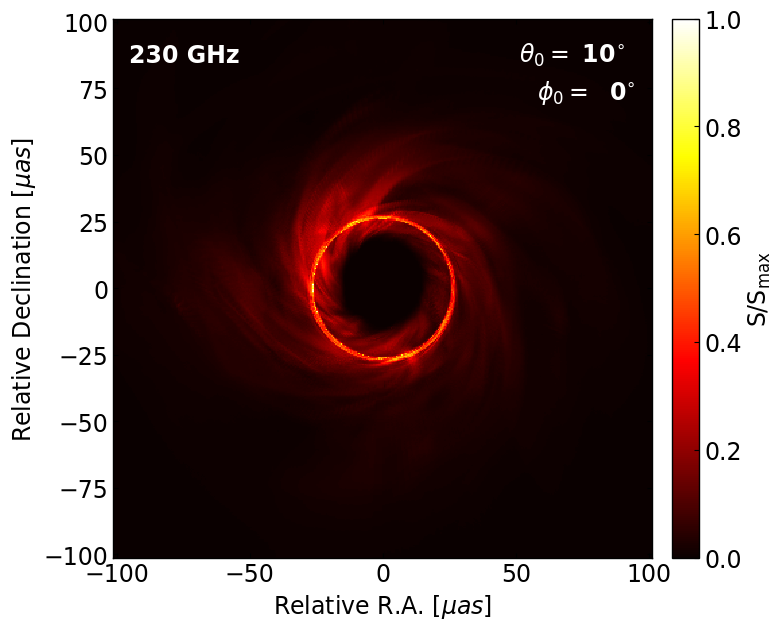

In [10]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [28]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [29]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc10/BHOSS_CODE
97, flux: 2.468273 at 9004.234232
98, flux: 2.409724 at 9014.746059
99, flux: 2.368740 at 9023.505435
100, flux: 2.297008 at 9034.016452
101, flux: 2.251035 at 9044.529609
102, flux: 2.224029 at 9053.290056
103, flux: 2.149964 at 9063.802536
104, flux: 2.110720 at 9074.314016
105, flux: 2.116723 at 9084.823874
106, flux: 2.135979 at 9093.581252
107, flux: 2.112079 at 9104.090482
108, flux: 2.090530 at 9114.601360
109, flux: 2.116007 at 9123.359993
110, flux: 2.156906 at 9133.870253
111, flux: 2.166869 at 9144.379583
112, flux: 2.165569 at 9154.889223
113, flux: 2.157640 at 9163.648327
114, flux: 2.142434 at 9174.157990
115, flux: 2.107991 at 9184.666192
116, flux: 2.100173 at 9193.424046
117, flux: 2.114937 at 9203.933544
118, flux: 2.147529 at 9214.444133
119, flux: 2.196516 at 9224.955775
120, flux: 2.228514 at 9233.717169
121, flux: 2.254373 at 9244.228854
122, flux: 2.266049 at 9254.740756
123, flux

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.014853 Jy, the density scale = 1.560000e-18


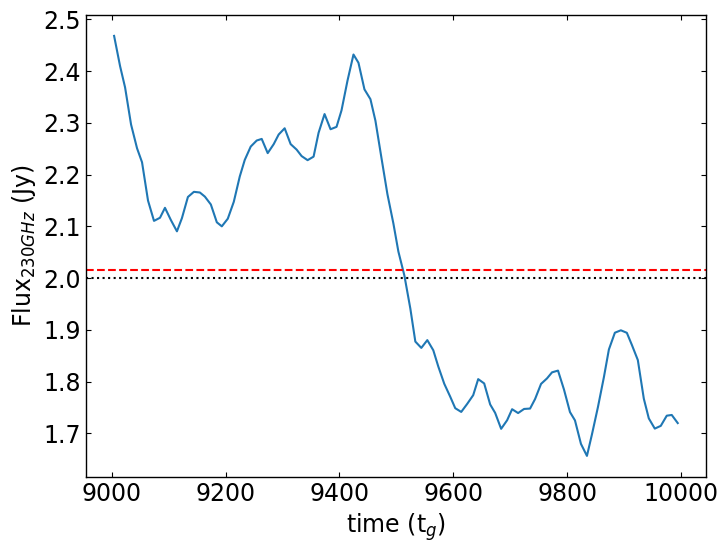

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [33]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.468273 Jy at 9004.234232
98:: 2.409724 Jy at 9014.746059
99:: 2.368740 Jy at 9023.505435
100:: 2.297008 Jy at 9034.016452
101:: 2.251035 Jy at 9044.529609
102:: 2.224029 Jy at 9053.290056
103:: 2.149964 Jy at 9063.802536
104:: 2.110720 Jy at 9074.314016
105:: 2.116723 Jy at 9084.823874
106:: 2.135979 Jy at 9093.581252
107:: 2.112079 Jy at 9104.090482
108:: 2.090530 Jy at 9114.601360
109:: 2.116007 Jy at 9123.359993
110:: 2.156906 Jy at 9133.870253
111:: 2.166869 Jy at 9144.379583
112:: 2.165569 Jy at 9154.889223
113:: 2.157640 Jy at 9163.648327
114:: 2.142434 Jy at 9174.157990
115:: 2.107991 Jy at 9184.666192
116:: 2.100173 Jy at 9193.424046
117:: 2.114937 Jy at 9203.933544
118:: 2.147529 Jy at 9214.444133
119:: 2.196516 Jy at 9224.955775
120:: 2.228514 Jy at 9233.717169
121:: 2.254373 Jy at 9244.228854
122:: 2.266049 Jy at 9254.740756
123:: 2.269138 Jy at 9263.502558
124:: 2.241675 Jy at 9274.015079
125:: 2.258913 Jy at 9284.527261
126:: 2.277614 Jy at 9293.287130
127:: 2.28969

In [34]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc30/BHOSS_CODE
97, flux: 2.514200 at 9004.234232
98, flux: 2.463211 at 9014.746059
99, flux: 2.418166 at 9023.505435
100, flux: 2.347717 at 9034.016452
101, flux: 2.299559 at 9044.529609
102, flux: 2.273356 at 9053.290056
103, flux: 2.199260 at 9063.802536
104, flux: 2.144609 at 9074.314016
105, flux: 2.136235 at 9084.823874
106, flux: 2.156797 at 9093.581252
107, flux: 2.159357 at 9104.090482
108, flux: 2.125941 at 9114.601360
109, flux: 2.136956 at 9123.359993
110, flux: 2.156750 at 9133.870253
111, flux: 2.158968 at 9144.379583
112, flux: 2.152381 at 9154.889223
113, flux: 2.141994 at 9163.648327
114, flux: 2.117329 at 9174.157990
115, flux: 2.069338 at 9184.666192
116, flux: 2.050683 at 9193.424046
117, flux: 2.055539 at 9203.933544
118, flux: 2.077968 at 9214.444133
119, flux: 2.122542 at 9224.955775
120, flux: 2.158044 at 9233.717169
121, flux: 2.196288 at 9244.228854
122, flux: 2.221353 at 9254.740756
123, flux

In [35]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [36]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.006956 Jy, the density scale = 1.450000e-18


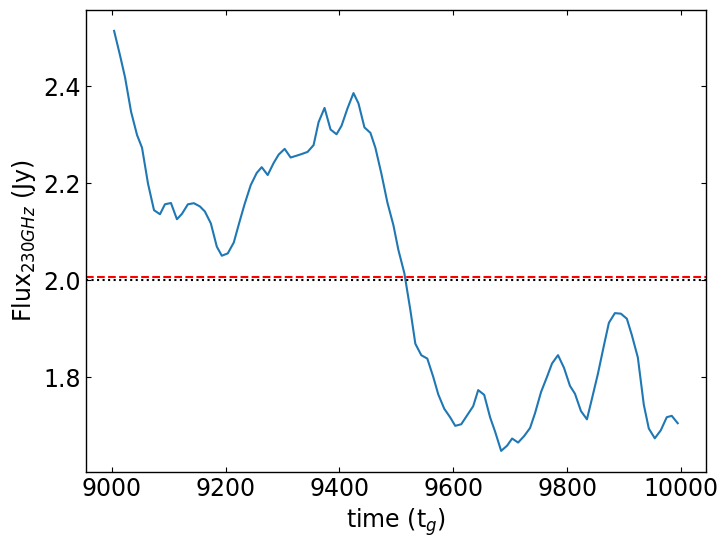

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [38]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.514200 Jy at 9004.234232
98:: 2.463211 Jy at 9014.746059
99:: 2.418166 Jy at 9023.505435
100:: 2.347717 Jy at 9034.016452
101:: 2.299559 Jy at 9044.529609
102:: 2.273356 Jy at 9053.290056
103:: 2.199260 Jy at 9063.802536
104:: 2.144609 Jy at 9074.314016
105:: 2.136235 Jy at 9084.823874
106:: 2.156797 Jy at 9093.581252
107:: 2.159357 Jy at 9104.090482
108:: 2.125941 Jy at 9114.601360
109:: 2.136956 Jy at 9123.359993
110:: 2.156750 Jy at 9133.870253
111:: 2.158968 Jy at 9144.379583
112:: 2.152381 Jy at 9154.889223
113:: 2.141994 Jy at 9163.648327
114:: 2.117329 Jy at 9174.157990
115:: 2.069338 Jy at 9184.666192
116:: 2.050683 Jy at 9193.424046
117:: 2.055539 Jy at 9203.933544
118:: 2.077968 Jy at 9214.444133
119:: 2.122542 Jy at 9224.955775
120:: 2.158044 Jy at 9233.717169
121:: 2.196288 Jy at 9244.228854
122:: 2.221353 Jy at 9254.740756
123:: 2.233244 Jy at 9263.502558
124:: 2.217039 Jy at 9274.015079
125:: 2.242051 Jy at 9284.527261
126:: 2.259157 Jy at 9293.287130
127:: 2.27093

In [39]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc50/BHOSS_CODE
97, flux: 2.539217 at 9004.234232
98, flux: 2.483534 at 9014.746059
99, flux: 2.434150 at 9023.505435
100, flux: 2.363617 at 9034.016452
101, flux: 2.313275 at 9044.529609
102, flux: 2.282168 at 9053.290056
103, flux: 2.194123 at 9063.802536
104, flux: 2.118898 at 9074.314016
105, flux: 2.091420 at 9084.823874
106, flux: 2.108952 at 9093.581252
107, flux: 2.113825 at 9104.090482
108, flux: 2.055085 at 9114.601360
109, flux: 2.051823 at 9123.359993
110, flux: 2.059236 at 9133.870253
111, flux: 2.069733 at 9144.379583
112, flux: 2.070069 at 9154.889223
113, flux: 2.061525 at 9163.648327
114, flux: 2.037625 at 9174.157990
115, flux: 1.969889 at 9184.666192
116, flux: 1.935737 at 9193.424046
117, flux: 1.935940 at 9203.933544
118, flux: 1.958493 at 9214.444133
119, flux: 1.997584 at 9224.955775
120, flux: 2.036607 at 9233.717169
121, flux: 2.072653 at 9244.228854
122, flux: 2.099685 at 9254.740756
123, flux

In [40]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [41]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.947129 Jy, the density scale = 1.300000e-18


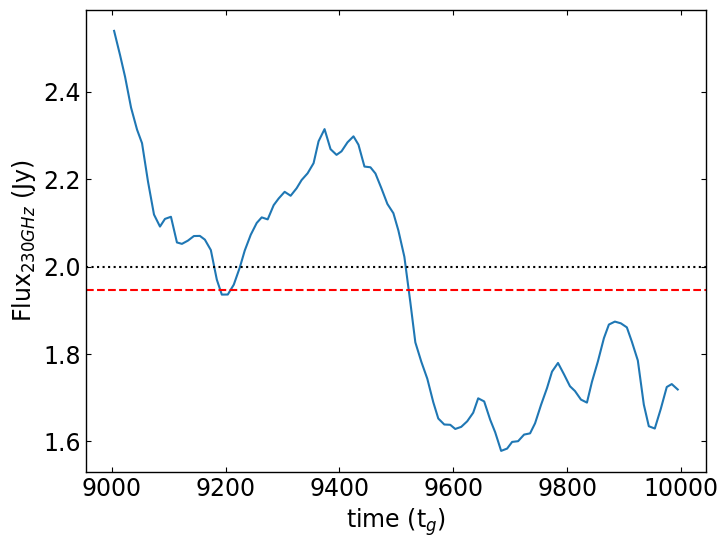

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [43]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.539217 Jy at 9004.234232
98:: 2.483534 Jy at 9014.746059
99:: 2.434150 Jy at 9023.505435
100:: 2.363617 Jy at 9034.016452
101:: 2.313275 Jy at 9044.529609
102:: 2.282168 Jy at 9053.290056
103:: 2.194123 Jy at 9063.802536
104:: 2.118898 Jy at 9074.314016
105:: 2.091420 Jy at 9084.823874
106:: 2.108952 Jy at 9093.581252
107:: 2.113825 Jy at 9104.090482
108:: 2.055085 Jy at 9114.601360
109:: 2.051823 Jy at 9123.359993
110:: 2.059236 Jy at 9133.870253
111:: 2.069733 Jy at 9144.379583
112:: 2.070069 Jy at 9154.889223
113:: 2.061525 Jy at 9163.648327
114:: 2.037625 Jy at 9174.157990
115:: 1.969889 Jy at 9184.666192
116:: 1.935737 Jy at 9193.424046
117:: 1.935940 Jy at 9203.933544
118:: 1.958493 Jy at 9214.444133
119:: 1.997584 Jy at 9224.955775
120:: 2.036607 Jy at 9233.717169
121:: 2.072653 Jy at 9244.228854
122:: 2.099685 Jy at 9254.740756
123:: 2.112444 Jy at 9263.502558
124:: 2.107879 Jy at 9274.015079
125:: 2.140400 Jy at 9284.527261
126:: 2.155707 Jy at 9293.287130
127:: 2.17096

In [56]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc70/BHOSS_CODE
97, flux: 2.642776 at 9004.234232
98, flux: 2.575747 at 9014.746059
99, flux: 2.510220 at 9023.505435
100, flux: 2.438696 at 9034.016452
101, flux: 2.369419 at 9044.529609
102, flux: 2.300488 at 9053.290056
103, flux: 2.186104 at 9063.802536
104, flux: 2.130129 at 9074.314016
105, flux: 2.105372 at 9084.823874
106, flux: 2.112520 at 9093.581252
107, flux: 2.107840 at 9104.090482
108, flux: 2.062770 at 9114.601360
109, flux: 2.062909 at 9123.359993
110, flux: 2.062991 at 9133.870253
111, flux: 2.107637 at 9144.379583
112, flux: 2.120867 at 9154.889223
113, flux: 2.101508 at 9163.648327
114, flux: 1.978885 at 9174.157990
115, flux: 1.869871 at 9184.666192
116, flux: 1.881752 at 9193.424046
117, flux: 1.929786 at 9203.933544
118, flux: 1.973979 at 9214.444133
119, flux: 2.041085 at 9224.955775
120, flux: 2.080527 at 9233.717169
121, flux: 2.097410 at 9244.228854
122, flux: 2.119522 at 9254.740756
123, flux

In [57]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [58]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.954408 Jy, the density scale = 1.200000e-18


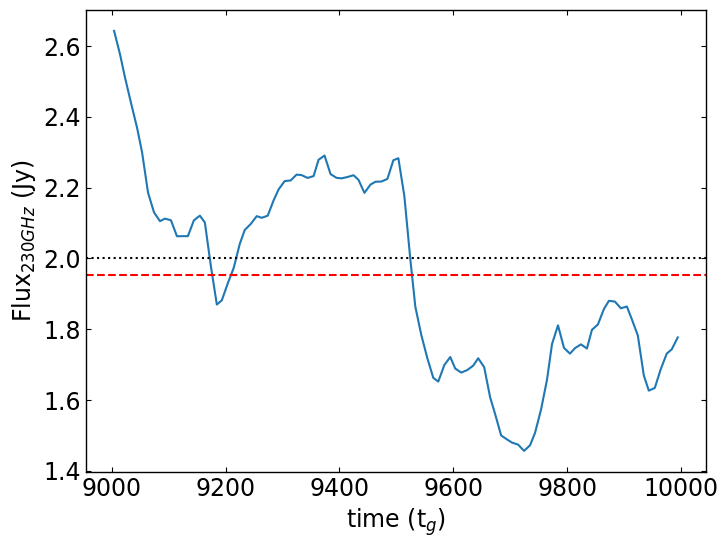

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [60]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.642776 Jy at 9004.234232
98:: 2.575747 Jy at 9014.746059
99:: 2.510220 Jy at 9023.505435
100:: 2.438696 Jy at 9034.016452
101:: 2.369419 Jy at 9044.529609
102:: 2.300488 Jy at 9053.290056
103:: 2.186104 Jy at 9063.802536
104:: 2.130129 Jy at 9074.314016
105:: 2.105372 Jy at 9084.823874
106:: 2.112520 Jy at 9093.581252
107:: 2.107840 Jy at 9104.090482
108:: 2.062770 Jy at 9114.601360
109:: 2.062909 Jy at 9123.359993
110:: 2.062991 Jy at 9133.870253
111:: 2.107637 Jy at 9144.379583
112:: 2.120867 Jy at 9154.889223
113:: 2.101508 Jy at 9163.648327
114:: 1.978885 Jy at 9174.157990
115:: 1.869871 Jy at 9184.666192
116:: 1.881752 Jy at 9193.424046
117:: 1.929786 Jy at 9203.933544
118:: 1.973979 Jy at 9214.444133
119:: 2.041085 Jy at 9224.955775
120:: 2.080527 Jy at 9233.717169
121:: 2.097410 Jy at 9244.228854
122:: 2.119522 Jy at 9254.740756
123:: 2.114868 Jy at 9263.502558
124:: 2.120764 Jy at 9274.015079
125:: 2.164699 Jy at 9284.527261
126:: 2.195328 Jy at 9293.287130
127:: 2.21852

In [61]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc90/BHOSS_CODE
97, flux: 2.519616 at 9004.234232
98, flux: 2.506691 at 9014.746059
99, flux: 2.444069 at 9023.505435
100, flux: 2.346484 at 9034.016452
101, flux: 2.277068 at 9044.529609
102, flux: 2.234004 at 9053.290056
103, flux: 2.150949 at 9063.802536
104, flux: 2.190735 at 9074.314016
105, flux: 2.044406 at 9084.823874
106, flux: 2.240413 at 9093.581252
107, flux: 2.224105 at 9104.090482
108, flux: 2.288327 at 9114.601360
109, flux: 2.248774 at 9123.359993
110, flux: 2.231465 at 9133.870253
111, flux: 2.347358 at 9144.379583
112, flux: 2.345988 at 9154.889223
113, flux: 2.341501 at 9163.648327
114, flux: 2.050998 at 9174.157990
115, flux: 1.900623 at 9184.666192
116, flux: 1.994877 at 9193.424046
117, flux: 2.099335 at 9203.933544
118, flux: 2.131721 at 9214.444133
119, flux: 2.203408 at 9224.955775
120, flux: 2.254144 at 9233.717169
121, flux: 2.275771 at 9244.228854
122, flux: 2.263256 at 9254.740756
123, flux

In [62]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [63]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.948849 Jy, the density scale = 1.150000e-18


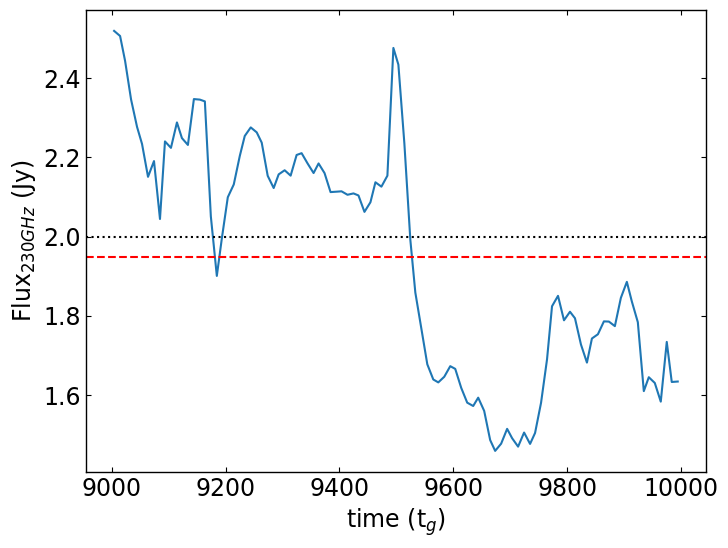

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [65]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.519616 Jy at 9004.234232
98:: 2.506691 Jy at 9014.746059
99:: 2.444069 Jy at 9023.505435
100:: 2.346484 Jy at 9034.016452
101:: 2.277068 Jy at 9044.529609
102:: 2.234004 Jy at 9053.290056
103:: 2.150949 Jy at 9063.802536
104:: 2.190735 Jy at 9074.314016
105:: 2.044406 Jy at 9084.823874
106:: 2.240413 Jy at 9093.581252
107:: 2.224105 Jy at 9104.090482
108:: 2.288327 Jy at 9114.601360
109:: 2.248774 Jy at 9123.359993
110:: 2.231465 Jy at 9133.870253
111:: 2.347358 Jy at 9144.379583
112:: 2.345988 Jy at 9154.889223
113:: 2.341501 Jy at 9163.648327
114:: 2.050998 Jy at 9174.157990
115:: 1.900623 Jy at 9184.666192
116:: 1.994877 Jy at 9193.424046
117:: 2.099335 Jy at 9203.933544
118:: 2.131721 Jy at 9214.444133
119:: 2.203408 Jy at 9224.955775
120:: 2.254144 Jy at 9233.717169
121:: 2.275771 Jy at 9244.228854
122:: 2.263256 Jy at 9254.740756
123:: 2.237331 Jy at 9263.502558
124:: 2.153555 Jy at 9274.015079
125:: 2.122660 Jy at 9284.527261
126:: 2.157129 Jy at 9293.287130
127:: 2.16753